# **Python Data Structures**

**If your name's not on the list...**

In [2]:
simple_list = [1, 2, 3]
# Indexing, runs from zero as for most languages
simple_list[0]

1

In [3]:
# Can also use negative indices to count 'backwards' from end of list
simple_list[-2]

2

In [4]:
# Can alter list elements directly using their index
simple_list[-2] = 10
simple_list

[1, 10, 3]

In [5]:
# Mixed types in lists are fine, but probably not practically useful
simple_list.append('banana')
simple_list

[1, 10, 3, 'banana']

In [6]:
simple_list.pop()
print(simple_list)

[1, 10, 3]


In [7]:
#Can also insert into lists at given index
simple_list.insert(0,4)
print(simple_list)

[4, 1, 10, 3]


**Tuples are similar to lists, but are 'immutable' once created**

In [8]:
simple_tuple = (1, 2, 3)

In [9]:
# Indexing works as usual
print(simple_tuple[0])
print(simple_tuple[-2])

1
2


In [10]:
# But this won't work
simple_tuple[1] = 10

# Neither are there pop, insert or append etc. methods for tuples.

TypeError: 'tuple' object does not support item assignment

In [11]:
# Note one subtlety: this will work, as we are changing an element of a list, and not the tuple
tuple_of_lists = ( [1,2], [3,4], [5,6] )
tuple_of_lists[0][1] = 10
print(tuple_of_lists)
# But this won't work
tuple_of_lists[0] = 'banana'

([1, 10], [3, 4], [5, 6])


TypeError: 'tuple' object does not support item assignment

In [12]:
# Iterating over elements of lists and tuples is easy-peasy
for item in simple_tuple:
    print(item)

1
2
3


In [13]:
# If we want indices too, use the enumerate function
# Note 'unpacking' the return of the enumerate function into two loop variables: index and item
for index, item in enumerate(simple_tuple):
    print("The item at index ", index, "is ", item)

The item at index  0 is  1
The item at index  1 is  2
The item at index  2 is  3


***Tuples are useful for holding collections of objects that should remain linked, e.g. coordinates***

In [14]:
coords = [ (1,2), (2,4), (3,9), (4,16) ]
labels = [ 'p1', 'p2', 'p3', 'p4' ]

# Use zip function here to 'zip' two (or more) iterables together into a single iterable
# Again 'unpacking' from the iterable returned by zip into two loop variables: coord and label
for coord, label in zip(coords, labels):
    print("Label", label, "Coord", coord)

Label p1 Coord (1, 2)
Label p2 Coord (2, 4)
Label p3 Coord (3, 9)
Label p4 Coord (4, 16)


In [15]:
# More typically, though, we are lazy, and trust to ourselves to keep the relative order of coordinates correct.
# Now using two separate lists
x_coords = [1, 2, 3, 4, 5]
y_coords = [1, 4, 9, 16, 25]

# **Plotting Data**

In [16]:
# Python has excellent plotting and visualisation packages. Matplotlib is probably the one you will use most often.
import matplotlib.pyplot as plt
plt.plot(x_coords, y_coords)
plt.show()

<Figure size 640x480 with 1 Axes>

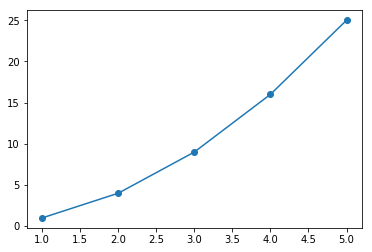

In [17]:
# Let's add point markers
plt.plot(x_coords, y_coords, marker='o')

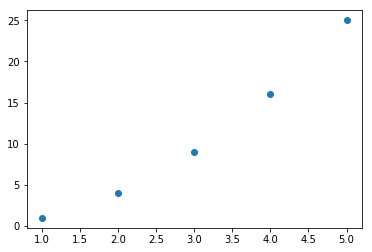

In [18]:
# Let's show only markers
plt.plot(x_coords, y_coords, 'o')

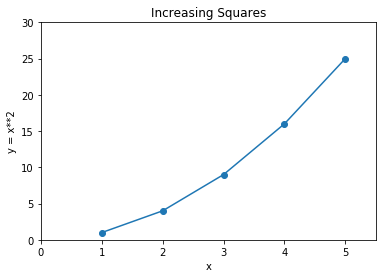

In [19]:
# All the bells and whistles
plt.title("Increasing Squares")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.axis(xmin=0, ymin=0, xmax=5.5, ymax=30)
plt.plot(x_coords,y_coords, marker="o")

In [20]:
# Let's create some data on a finer scale to plot alongside our points
# We'll use two functions for this
def square(x):
    return x**2

def fp_range(start, stop, increment):
# Returns a range of floating point numbers
    out = []
    while start <= stop:
        out.append(start)
        start += increment
    return out

x_fine = fp_range(1, 5, 0.1)
# map applies a function to a list, but in Python3, it returns an iterator. Don't worry too much about this,
# can be easily converted to a list
y_fine = map(square, x_fine)
print(type(y_fine))
y_fine = list(y_fine)
# or can use a 'list comprehension'. This is probably more intuitive
y_fine = [ square(x) for x in x_fine ]

<class 'map'>


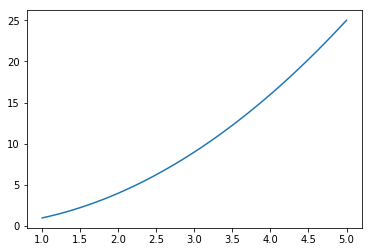

In [21]:
plt.plot(x_fine, y_fine)

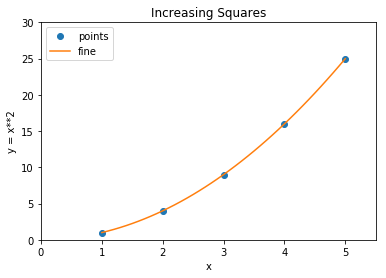

In [22]:
# Two plots, add a legend
plt.title("Increasing Squares")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.axis(xmin=0, ymin=0, xmax=5.5, ymax=30)
plt.plot(x_coords,y_coords, "o", label="points")
plt.plot(x_fine, y_fine, label="fine")
plt.legend()

# **A Bit of NumPy**

***Python lists are pretty slow. Use NumPy (Numerical Python) arrays to speed things along!***<br/>
***Near low-level C code speeds from Python, and lots of extra useful functionality!***

In [23]:
print("Sum the first 10 million whole numbers")

n = 10000000
datatype = 'int64'

# list comprehension
nums= [ i for i in range(n) ]
print( "Native Python sum, native Python list" )
%time sum1 = sum(nums)
print(sum1)

import numpy as np
arr = np.array( [ i for i in range(n) ], dtype = datatype )
print( "NumPy vectorized sum, NumPy array")
%time sum2 = np.sum(arr)
print(sum2)

print( "Native Python sum, NumPy array")
%time sum3 = sum(arr)
print(sum3)

arr = np.arange( n, dtype = datatype )
print( "Numpy vectorized sum, NumPy array using arange")
%time sum4 = np.sum(arr)
print(sum4)

# Try setting datatype to None (will warn about overflow), 'int16' (no warning), 'int32', 'int64' (no overflow)
# Probably good to set the following for safety until you become more experienced
#np.seterr(all='warn')


Sum the first 10 million whole numbers
Native Python sum, native Python list
CPU times: user 154 ms, sys: 0 ns, total: 154 ms
Wall time: 153 ms
49999995000000
NumPy vectorized sum, NumPy array
CPU times: user 14.7 ms, sys: 3.14 ms, total: 17.9 ms
Wall time: 16.7 ms
49999995000000
Native Python sum, NumPy array
CPU times: user 1.65 s, sys: 7.18 ms, total: 1.66 s
Wall time: 1.64 s
49999995000000
Numpy vectorized sum, NumPy array using arange
CPU times: user 17.6 ms, sys: 143 µs, total: 17.7 ms
Wall time: 16.6 ms
49999995000000


# **Some Functions and Their Inverses**

In [24]:
# Quick run-through of the theory of functions on board: 
#   Domain, codomain and range
#   When a function has an inverse
#   !! Make analogy with functions in coding sense, useful !!
#   Common functions and inverses, examples might be: sin(x), sin-1(x); and f(x) = x**2, f-1(x) = +sqrt(x)

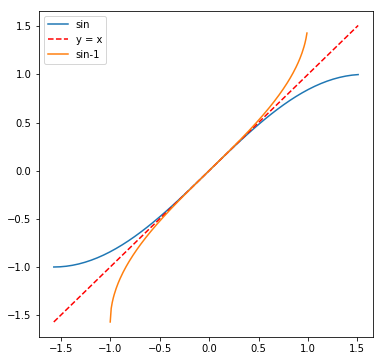

In [25]:
import numpy as np
from math import pi
x = np.arange(-pi/2, pi/2, pi/50)
sinx = np.sin(x)
plt.figure(figsize = (6, 6))
plt.plot(x, sinx, label="sin")
plt.plot(x, x, 'r--', label='y = x')
x = np.arange(-1, 1, 0.01)
arcsinx = np.arcsin(x)
plt.plot(x, arcsinx, label="sin-1")

plt.legend()

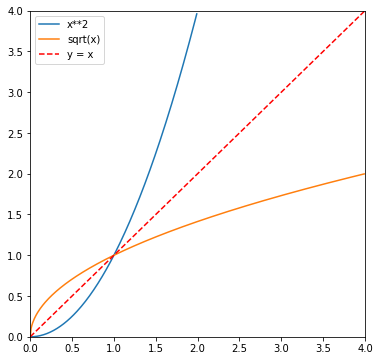

In [26]:
x = np.arange(0,2,0.01)
xsquare = x**2
plt.figure(figsize = (6, 6))
plt.plot(x, xsquare, label="x**2")
x = np.arange(0,4,0.01)
xroot = np.sqrt(x)
plt.plot(x, xroot, label="sqrt(x)")
plt.plot(x, x, 'r--', label = 'y = x' )
plt.axis([0,4,0,4])
plt.legend()

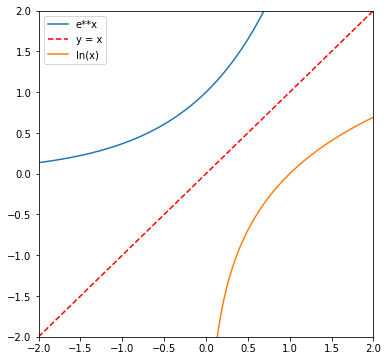

In [27]:
#//Depending on time, maybe show this below
x = np.arange(-2,2,0.01)
ex = np.exp(x)
plt.figure(figsize = (6, 6))
plt.plot(x, ex, label="e**x")
plt.plot(x, x, 'r--', label="y = x")
x = np.arange(0.01,2,0.01)
lnx = np.log(x)
plt.plot(x, lnx, label="ln(x)")
plt.axis([-2, 2, -2, 2])
plt.legend()

# **Optional - Plotting Functions of Multiple Variables**

In [28]:
#// Time is short, probably miss this and come back

In [29]:
# Let's do all the imports in one
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show

In [30]:
# Define the complicated function to plot
def f(x, y):
    return np.sin(x) ** 10 + np.cos(y * x) * np.cos(x)

In [31]:
# Set up two-dimensional mesh of points (x,y) and calculate the values of z_func at those points
x = np.arange(0.,5.,0.01)
y = np.arange(0.,5.,0.01)
X, Y = meshgrid(x, y)
Z = f(X, Y)

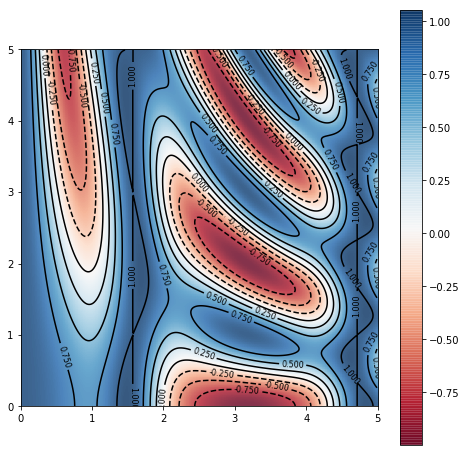

In [32]:
plt.figure(figsize = (8, 8))
# Plot countours in black, spacing 8 contour lines over z-range of plot
contours = plt.contour(X, Y, Z, 8, colors = 'black')
# Label the contours
plt.clabel(contours, inline = True, fontsize = 8)
# Draw a red-blue colormap to go with the contours, transparency = 0.8 
plt.imshow(Z, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'RdBu', alpha = 0.8)
# Show a colormap legend
plt.colorbar();

# **Straight Lines**

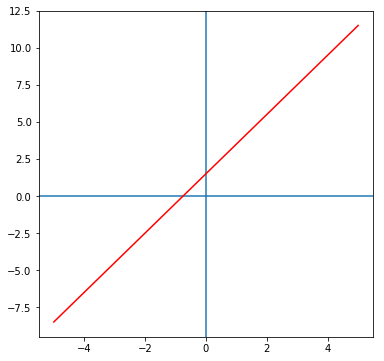

In [33]:
# Basic equation of a straight line, y = m * x + c
# m is gradient
# c is y-axis intercept
def line(x, gradient, intercept):
    return gradient * x + intercept

xmin = -5.
xmax = 5.
delta = 0.001
x = np.arange(xmin, xmax, delta)
# line y = 2*x + 1.5
y = line(x, gradient = 2, intercept = 1.5 )
plt.figure(figsize = (6, 6))
plt.axhline(y = 0)
plt.axvline(x = 0)
plt.plot(x, y, 'r-')


In [34]:
# Where does the line intercept the x-axis? 
# Where y = 0, this is called finding the 'root' of the function f(x) = 2*x + 1.5
# Or 'solving' 2*x + 1.5 = 0
x_intercept_index = list( np.where( y == 0. ) )
print(x_intercept_index)

[array([], dtype=int64)]


In [35]:
# Hmm, empty array, but the line clearly crosses the x-axis. Where is the zero value?
# The problem here is that y may never be 'exactly equal' to zero.
# The x-array may not contain the exact value of the root, and so y will never exactly equal zero.
# Or, possibly, equality comparisons of floats strikes again: the x-array does contain the exact root,
# but the equality comparison fails us!
# Let's find the root numerically instead
def roots_finder_index( array ):
    return list( np.where( np.diff( np.sign( array ) ) != 0 )[0])

print("Root after index", roots_finder_index(y) )

Root after index [4249]


In [36]:
def better_root_finder( x, y ):
    # Sanity check
    if len(x) != len(y):
        raise ValueError("x and y arrays not same length")
    # The where - diff combination below returns the lower indices of a sign change
    # Root can be in range x[lower] <= root <= x[upper]
    roots_indices = list( np.where( np.diff( np.sign( y ) ) != 0 )[0] )
    paired_roots_indices = []
    for root_index in roots_indices:
        # lower index
        paired_roots_indices.append(root_index)
        # upper index
        paired_roots_indices.append(root_index + 1)
    paired_roots_indices = np.array(paired_roots_indices)
    return x[paired_roots_indices]

better_root_finder(x,y)

array([-0.751, -0.75 ])

In [37]:
# Board, solve 2*x + 1.5 = 0

# **Polynomials - Quadratics**

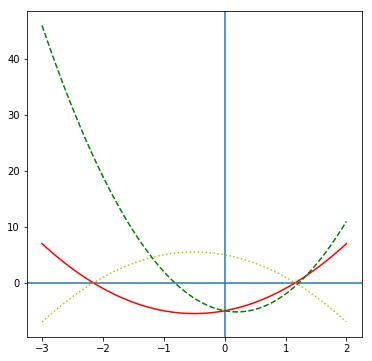

In [38]:
# Basic equation of a quadratic, y = a0 + a1 * x + a2 * x**2
# Quadratic has a maximum of two real roots, and one turning point
def quad(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

xmin = -3.
xmax = 2.
delta = 0.001
x = np.arange(xmin, xmax, delta)
y = quad(x, a0 = -5, a1 = 2, a2 = 2 )
# Let's see what happens when we multiply the coeffs by -1
#//Make point about the curvature of the polynomial being determined by sgn(a2)
y2 = quad(x, a0 = 5, a1 = -2, a2 = -2)
y3 = quad(x, a0 = -5, a1 = -2, a2 = 5)
plt.figure(figsize = (6, 6))
plt.axhline(y = 0)
plt.axvline(x = 0)
plt.plot(x, y, 'r-') # red solid line
plt.plot(x, y2, 'y:') # yellow dotted line
plt.plot(x, y3, 'g--') # green dashed line

In [ ]:
roots = better_root_finder(x,y)
print(roots)

In [ ]:
# Turning point is equidistant between the roots
root1 = (roots[0] + roots[1])/2
root2 = (roots[2] + roots[3])/2
x_tp = (root1 + root2)/2
print("x_tp=", x_tp)
print("y_tp=", quad(x_tp, -5, 2, 2))

# **Higher Order Polynomials** 
The order, n, of a polynomial is the highest power to which the variable is raised.<br/>
So n = 2 for a quadratic, and now we'll consider higher orders. 


**Cubics, n = 3**<br/>
Notice with a quadratic that the function heads away from the x-axis in the same direction as x becomes large and positive, or large and negative.
<br/>//Draw on board, quadratic with a_2 +ve and a_2 -ve
<br/>This is because a negative number squared is positive, and a positive number squared is positive
<br/>Now, for a cubic, a negative number cubed is negative, and a positive number cubed is positive.
<br/>So we expect a cubic to head away from the x-axis in opposite directions as x becomes large and negative, or large and positive
<br/>//Draw on board, cubic with a_3 +ve and a_3 -ve

In [ ]:
# We will eventually look at higher order polynomials, so let's save ourselves a bit of time
# and write a general purpose function to calculate a polynomial to arbitrary order
# The coefficients will be passed in as a list
def order_n_poly(x, n, coeffs):
    '''
    Calculates f(x) for an order n polynomial
    coeffs is a list, where list index corresponds to order of coefficient
    i.e. coeffs[0] = a_0 etc...
    '''
    # First, check coeffs list is correct length
    # e.g. second order poly, n = 2, expects coeffs = [a0, a1, a2]
    if len(coeffs) != n + 1:
        raise RuntimeError('Coeffs array length not equal to n + 1')

    fx = 0.
    for index in range(n + 1):
        fx += coeffs[index] * x ** index
    
    return fx

In [ ]:
# Just to see whether this is working, let's replot the first quadratic from above
xmin = -3.
xmax = 2.
delta = 0.001
x = np.arange(xmin, xmax, delta)
coeffs = [-5, 2, 2]
y = order_n_poly(x, 2, coeffs )
plt.figure(figsize = (6, 6))
plt.axhline(y = 0)
plt.axvline(x = 0)
plt.plot(x, y, 'r-')

In [ ]:
# While we're at it, constantly re-typing all this matplotlib stuff is annoying.
# Let's make a function to do it.
# In Python, functions are 'first class citizens', they can be passed as arguments to other functions
# So we'll pass in the function to plot
# // Explain *args
def pretty_plot(xmin = -2, xmax = 2, delta = 0.001, plot_fn = None, **kwargs):
    '''
    Wrapper setting up reasonable plot of plot_fn
    '''
    x = np.arange(xmin, xmax, delta)
    y = plot_fn(x, **kwargs)
    plt.figure(figsize = (6, 6))
    plt.axhline(y = 0)
    plt.axvline(x = 0)
    plt.plot(x, y, 'r-')
    plt.show()

In [ ]:
pretty_plot(xmin = -3, xmax = 2, delta = 0.001, plot_fn = order_n_poly, n = 2, coeffs = [-5, 2, 2])

In [ ]:
# Such a long argument list could get confusing though. Let's instead pass in a lambda
original_quad = lambda x: order_n_poly(x, n = 2, coeffs = [-5, 2, 2] )
pretty_plot(xmin = -3, xmax = 2, delta = 0.001, plot_fn = original_quad)

In [ ]:
# Now let's try a cubic
cubic = lambda x: order_n_poly(x, n = 3, coeffs = [-2, 1, 4, 1])
pretty_plot(xmin = -4, xmax = 2, delta = 0.001, plot_fn = cubic)

In [ ]:
# Point out trends so far:
# quadratic, n = 2, 2 roots, 1 turning point
# cubic, n = 3, 3 roots, 2 turning points

In [ ]:
# Now try a quartic function, n = 4
# Before we start, how many roots and turning points do you expect?
#// Ask people to play around with this, finding reasonable coeffs and x-ranges etc.
quartic = lambda x: order_n_poly(x, n = 4, coeffs = [5, 10, -5, -3, 1])
pretty_plot(xmin = -2, xmax = 4, delta = 0.001, plot_fn = quartic)

In [ ]:
# Point out trends so far:
# quadratic, n = 2, 2 roots, 1 turning point
# cubic, n = 3, 3 roots, 2 turning points
# quartic, n = 4, 4 roots, 3 turning points

In [ ]:
# These are *maximum* values, i.e. you can find a cubic with, for example, 1 root and 1 turning point
# Although the function doesn't turn at this 'turning point'. It's instead known as a point of inflection
# and we should be talking instead about 'stationary points'. More on this with calculus.
#// Mention here that at these stationary points, the function 'locally' lies parallel to the x-axis
cubic_less_roots_tps = lambda x: order_n_poly(x, n = 3, coeffs = [2, 0, 0, 2])
pretty_plot(xmin = -2, xmax = 2, delta = 0.001, plot_fn = cubic_less_roots_tps)

**Exponentials**

In [ ]:
# An exponential function is of the form f(x) = b**x
# where b is known as the 'base' of the exponential.
# Note the difference with polynomials, where terms where of the form a * x**n
# Now, for an exponential, the x is in the power. 
# These functions tend to increase or decrease very rapidly as x moves away from 0
def exponential(x, base):
    return base ** x

exp_base_2 = lambda x: exponential(x, 2)
exp_base_4 = lambda x: exponential(x, 4)
pretty_plot(xmin = -2, xmax = 2, delta = 0.001, plot_fn = exp_base_2)
pretty_plot(xmin = -2, xmax = 2, delta = 0.001, plot_fn = exp_base_4)

In [ ]:
#What does 2 to the power of a negative integer mean?
print( 2**-1 )
print( 2**-2 )
print( 2**-3 )

In [ ]:
# What does 10 to the power of a negative integer mean?
print( 10**-1 )
print( 10**-2 )
print( 10**-3 )

In [ ]:
#// Board - 2**-1 = 1/2. 2**-2 = 1/2**2 = 1/4. 2**-3 = 1/2**3 = 1/8 etc...

In [ ]:
# What about 2 to the power of zero? 10 to the power of zero?
print( 2**0 )
print( 10**0 )

In [ ]:
#// Board. Any base to the power 0 equals 1.

In [ ]:
# More tricky. What about 2**(1/2)?
print( 2**(1/2) )
#// Anyone recognise this number?
mystery_number = 2**(1/2)
print( mystery_number * mystery_number )

In [ ]:
# So 2**(1/2) equals the square root of 2.

In [ ]:
#// Exercise -  Try something similar with 2**(1/3)
mystery_number = 2 ** (1/3)
print( mystery_number * mystery_number * mystery_number )

In [ ]:
# i.e. 2**(1/3) is the cube root of 2. Pattern continues. 2**(1/4) is fourth root etc...

**Laws of exponents**

Law I - b^x * b^y = b^(x+y)

In [1]:
#// Illustrate with base 2
#// e.g. 2 ** 3 * 2 ** 5 = 2*2*2 * 2*2*2*2*2 = 2*2*2*2*2*2*2*2 = 2 ** 8
print( (5 ** 3) * (5 ** 7) )
print( 5 ** 10 )

print( (0.1 ** 0.2) * (0.1 ** 0.3) )
print( 0.1 ** 0.5 )

9765625
9765625
0.316227766016838
0.31622776601683794


Law II - b^x / b^y = b^(x-y)

In [2]:
# e.g. 2 ** 4 / 2 ** 1 = 2*2*2*2 / 2 = 2*2*2 = 2 ** 3
print( (5**7) / (5**3) )
print( 5**4 )
# Note behaviour - an integer quotient yields a float

print( (0.1**0.7) / (0.1**0.1) )
print( (0.1**0.6))

625.0
625
0.25118864315095807
0.251188643150958


Law III - (b^x)^y = b^(x*y)

In [ ]:
# e.g. (2 ** 2) ** 3 = (2*2) * (2*2) * (2*2) = 2 ** 6
print( (5**2)**3 )
print( 5**6 )

**Logarithms**

In [6]:
# What are logarithms? They cause fear in people, and even experienced mathematicians often need to stop 
# to think carefully about them.

# Follow this closely. We'll choose a base, say 5, and raise it to a power, say 8
exponential = 5 ** 8
print(exponential)

# Now we'll take the 'log to the base 5' of the number we just computed
from math import log
# syntax log(a, b), a = argument, b = base 
log_of_exponential = log(exponential, 5)
print(log_of_exponential)

# We get back the power that we raised 5 to in the first place

390625
8.0


Think of this every time you encounter a log, repeat it as a mantra!:<br/>
**"The log to the base b of a number is the power to which b would have to be raised to get that number"**

As we saw above, the logarithm is the inverse function of the exponential

y = b\**p <=> log_b(y) = p

In [7]:
#//Voxpop. Try log_2(4) = 2
#// Mantra - 'to what power must we raise 2 to get 4?'
#// log_3(27) = 3
#// log_10(10000) = 4
#// Next two more tricky, think of the laws of exponentials above
#// log_7(7) = 1
#// log_9(1) = 0

In [8]:
# log_2 is used very commonly in computer science, as it deals with the 'doubling and halving' of problems
# Imagine we have an array of length 128. How many times can we halve this into two equally sized problems?
print(log(128,2))

7.0


In [9]:
print(2**7)
# We can halve this problem 7 times. This is why many 'divide-and-conquer' algorithms scale as the log_2 of the 
# 'size' of the problem.

128


**Laws of logarithms**

For each of the laws of exponentials above, there is a corresponding law of logarithms

Law I - log_b(x) + log_b(y) = log_b(x*y)

In [11]:
lhs = log(125, 5) + log(625, 5)
rhs = log(125*625, 5)
print(lhs)
print(rhs)

7.0
7.0


Law II - log_b(x) - log_b(y) = log_b(x/y)

In [13]:
lhs = log(625, 5) - log(125, 5)
rhs = log(625/125, 5)
print(lhs)
print(rhs)

0.9999999999999996
1.0


Law III - log_b(x^y) = y * log_b(x)

In [15]:
lhs = log(125**2, 5)
rhs = 2 * log(125, 5)
print(lhs)
print(rhs)

6.000000000000001
6.000000000000001
